## Observations and Insights

One observation is that the gender distribution of male and female mice is generally even. This implies that the equal distribution was used to show meaningful results and that the drug regimens do not favor one gender over another.

A second observation is that the boxplot shows just one outlier for the drug Infubinol, which implies that one can expect tumor volume for each drug regimen to be on the range shown. The boxplot also shows that Capomulin and Ramicane seem to do a better job decreasing tumor vol than Infubinol and Ceftamin, which implies that Capomulin/Ramicane are more effective at treating tumors.

A third observation shows that the scatterplot (for Capomulin) has a correlation of 0.84, which implies that the heavier the mice, the higher the tumor vol.

## Matplotlib Challenge

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [51]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [52]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [53]:
# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, how = 'outer', on='Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].count()
number_of_mice

1893

In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [69]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

1888

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen
statistics_list = clean_df.groupby(['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = round(statistics_list['Tumor Volume (mm3)'].mean(),2)
median = round(statistics_list['Tumor Volume (mm3)'].median(),2)
variance = round(statistics_list['Tumor Volume (mm3)'].var(),2)
standard_deviation = round(statistics_list['Tumor Volume (mm3)'].std(),2)
sem = round(statistics_list['Tumor Volume (mm3)'].sem(),2)

summary_statistics_df = pd.DataFrame ({"Mean": mean,
                                       "Median": median,
                                       "Variance": variance,
                                       "Standard Deviation": standard_deviation,
                                       "SEM": sem
})

summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]) 
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ceftamin'),
 Text(2, 0, 'Infubinol'),
 Text(3, 0, 'Ketapril'),
 Text(4, 0, 'Naftisol'),
 Text(5, 0, 'Placebo'),
 Text(6, 0, 'Propriva'),
 Text(7, 0, 'Ramicane'),
 Text(8, 0, 'Stelasyn'),
 Text(9, 0, 'Zoniferol')]

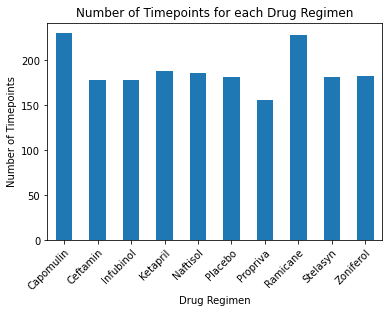

In [80]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_and_timepoints = clean_df.groupby('Drug Regimen')['Timepoint'].count()

bar_chart = regimen_and_timepoints.plot(kind='bar', x='Drug Regimen', y='Number of Timepoints',
                                               title='Number of Timepoints for each Drug Regimen')
plt.ylabel('Number of Timepoints')
xticklabels = regimen_and_timepoints.index
bar_chart.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

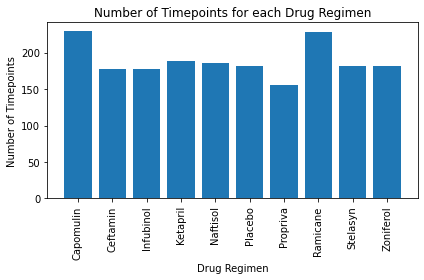

In [86]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(clean_df['Drug Regimen'].unique()))
tick_locations = [x for x in x_axis]
regimen_and_timepoints2 = clean_df.groupby('Drug Regimen').count().reset_index()


plt.title('Number of Timepoints for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

plt.bar(x_axis, regimen_and_timepoints2['Timepoint'], align='center')
plt.xticks(tick_locations, regimen_and_timepoints2['Drug Regimen'], rotation='vertical')
plt.tight_layout()
plt.show()



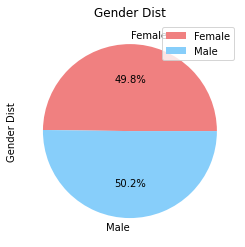

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
unique_mice_df = clean_df.drop_duplicates('Mouse ID', keep='first')
sex_mice = unique_mice_df.groupby('Sex').count()
pie_chart = sex_mice.plot(kind='pie', y='Mouse ID', autopct='%1.1f%%',
                                           colors=['lightcoral', 'lightskyblue'],
                                           title='Gender Dist', legend=True, ylabel='Gender Dist')

Text(0.5, 1.0, 'Gender Dist')

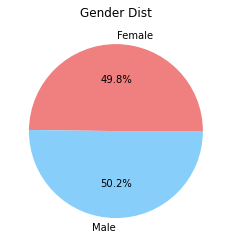

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
unique_mice_df2 = sex_mice.reset_index()
plt.pie(unique_mice_df2['Mouse ID'], labels=unique_mice_df2['Sex'], colors=['lightcoral', 'lightskyblue'],
       autopct="%1.1f%%")
plt.title('Gender Dist')


## Quartiles, Outliers and Boxplots

In [115]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
best_regimens = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') |
                                 (clean_df['Drug Regimen'] == 'Ramicane') |
                                 (clean_df['Drug Regimen'] == 'Infubinol') |
                                 (clean_df['Drug Regimen'] == 'Ceftamin')]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
group_DF = best_regimens.sort_values('Timepoint', ascending=False).groupby('Mouse ID').first().reset_index()
group_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [125]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
bounds = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatments:
    regimenvolumedate = group_DF.loc[group_DF["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]
    
            
    mouseid = regimenvolumedate.index.tolist()
    idvalues = regimenvolumedate.values.tolist()
    
    tumor_vol_data.append(idvalues)
    
    mousequartile = regimenvolumedate.quantile([.25,.5,.75])
    
    mouselowerq = mousequartile[0.25]
    mouseupperq = mousequartile[0.75]
    mouseiqr = mouseupperq-mouselowerq
    mouselower_bound = mouselowerq - (1.5*mouseiqr)
    mouseupper_bound = mouseupperq + (1.5*mouseiqr)
    bounds.append([mouselower_bound, mouseupper_bound])
    
    print(regimen)
    print(f" Lower quartile of final tumor volume is: {mouselowerq.round(2)} (mm3)")
    print(f" Upper quartile of final tumor volume is: {mouseupperq.round(2)} (mm3)")
    print(f" Interquartile range of final tumor volume is: {mouseiqr.round(2)} (mm3)")
    print(f" Median range of final tumor volume is: {mousequartile[.5].round(2)} (mm3)")
    print(f" Values below {mouselower_bound.round(2)} (mm3) could be outliers.")
    print(f" Values above {mouseupper_bound.round(2)} (mm3) could be outliers.\n")   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

for i in range(4):
    
    outliers = group_DF.loc[(group_DF['Drug Regimen'] == treatments[i]) & 
                                ((group_DF['Tumor Volume (mm3)'] < bounds[i][0]) |
                                 (group_DF['Tumor Volume (mm3)'] > bounds[i][1]))]
    
    if not outliers.empty:
        print(f"The following mice are outliers for the treatment {treatments[i]} because their Tumor Volume is either ")
        print(f"less than {bounds[i][0]} or")
        print(f"greater than {bounds[i][1]}")
        display(outliers)

Capomulin
 Lower quartile of final tumor volume is: 32.38 (mm3)
 Upper quartile of final tumor volume is: 40.16 (mm3)
 Interquartile range of final tumor volume is: 7.78 (mm3)
 Median range of final tumor volume is: 38.13 (mm3)
 Values below 20.7 (mm3) could be outliers.
 Values above 51.83 (mm3) could be outliers.

Ramicane
 Lower quartile of final tumor volume is: 31.56 (mm3)
 Upper quartile of final tumor volume is: 40.66 (mm3)
 Interquartile range of final tumor volume is: 9.1 (mm3)
 Median range of final tumor volume is: 36.56 (mm3)
 Values below 17.91 (mm3) could be outliers.
 Values above 54.31 (mm3) could be outliers.

Infubinol
 Lower quartile of final tumor volume is: 54.05 (mm3)
 Upper quartile of final tumor volume is: 65.53 (mm3)
 Interquartile range of final tumor volume is: 11.48 (mm3)
 Median range of final tumor volume is: 60.17 (mm3)
 Values below 36.83 (mm3) could be outliers.
 Values above 82.74 (mm3) could be outliers.

Ceftamin
 Lower quartile of final tumor volum

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
15,c326,Infubinol,Female,18,25,5,36.321346,0


Text(0, 0.5, 'Tumor volume (mm3)')

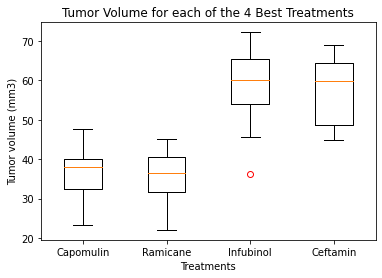

In [128]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol = pd.DataFrame({'Capomulin': tumor_vol_data[0],
                        'Ramicane': tumor_vol_data[1],
                           'Infubinol': tumor_vol_data[2],
                           'Ceftamin': tumor_vol_data[3]})

flierprops = dict(marker='o', color='red', markeredgecolor='red')

fig, ax = plt.subplots()
ax.boxplot(tumor_vol, flierprops=flierprops)

ax.set_xticklabels(treatments)
plt.title("Tumor Volume for each of the 4 Best Treatments")
ax.set_xlabel("Treatments")
ax.set_ylabel("Tumor volume (mm3)")

## Line and Scatter Plots

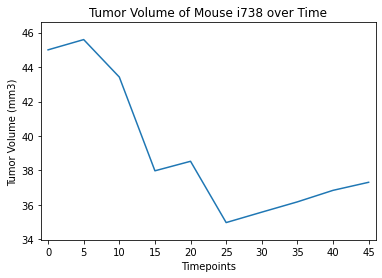

In [137]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

mouse = capomulin.sample(n=1)['Mouse ID'].to_list()

mouse_over_time = capomulin.loc[capomulin['Mouse ID'] == mouse[0]]

mouse_tumor_vol = mouse_over_time['Tumor Volume (mm3)'].to_list()
mouse_timepoint = mouse_over_time['Timepoint'].to_list()

plt.title("Tumor Volume of Mouse " + mouse[0] + " over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")

plt.xticks(np.arange(min(mouse_timepoint), max(mouse_timepoint)+1, 5.0))

plt.xlim(min(mouse_timepoint)-1, max(mouse_timepoint)+1)
plt.ylim(min(mouse_tumor_vol)-1, max(mouse_tumor_vol)+1)

plt.plot(mouse_timepoint, mouse_tumor_vol)
plt.show()

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for Capomulin regimen')

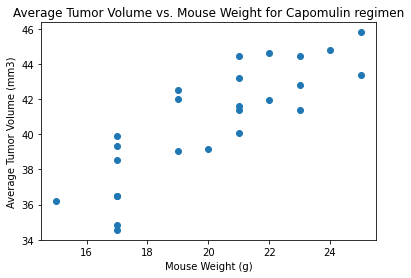

In [138]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = capomulin.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(capomulin_scatter.iloc[:,0], capomulin_scatter.iloc[:,1])

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin regimen')

## Correlation and Regression

In [139]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = capomulin_scatter.iloc[:,0]
avg_vol = capomulin_scatter.iloc[:,1]

correlation = st.pearsonr(weight, avg_vol)
print(f"correlation coefficient is {round(correlation[0], 2)}.")

correlation coefficient is 0.84.


Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for Capomulin regimen')

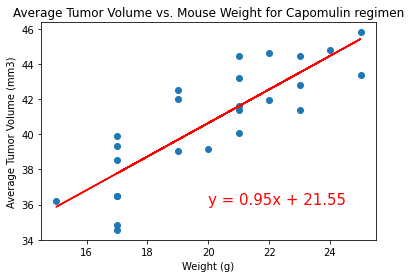

In [140]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_vol)
regress_values = weight * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight, avg_vol)
plt.plot(weight, regress_values, "r-")

plt.annotate(line_equation, (20,36), fontsize=15, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin regimen')